In [2]:
import random
import string
from faker import Faker
import pandas as pd
fake = Faker()


# Generate random email names
def generate_random_email_names(n):
    names = []
    for _ in range(n):
        length = random.randint(3, 15)  # Randomly choose a length between 3 to 15
        name = ''.join(random.choice(string.ascii_lowercase) for _ in range(length))
        
        # 20% chance to add numbers
        if random.random() < 0.2:
            # Add a random 1-3-digit or 4-digit number
            number = str(random.randint(1,250)) if random.random() < 0.8 else str(random.randint(1900, 2023))
            # Position the number either at the start, end, or middle of the name
            position = random.choice(['start', 'end'])
            if position == 'start':
                name = number + name
            elif position == 'middle' and len(name) > 2:
                split_idx = len(name) // 2
                name = name[:split_idx] + number + name[split_idx:]
            else:
                name += number
        
        names.append(name)
    return names

def generate_fake_email_names_with_numbers(n):
    names = []
    for _ in range(n):
        email = fake.email()
        name_part = email.split('@')[0]
        
        # Introduce more numbers into the email names
        if random.random() < 0.2:  # 20% chance to add numbers
            # Add a random 1-3-digit or 4-digit number
            number = str(random.randint(1, 250)) if random.random() < 0.5 else str(random.randint(1900, 2023))
            # Position the number either at the start, end, or middle of the name
            position = random.choice(['start', 'middle', 'end'])
            if position == 'start':
                name_part = number + name_part
            elif position == 'middle' and len(name_part) > 2:
                split_idx = len(name_part) // 2
                name_part = name_part[:split_idx] + number + name_part[split_idx:]
            else:
                name_part += number
        
        names.append(name_part)
    return names



from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def classifiers_gen():
    """Generate a dictionary of classifiers."""
    # Model Training & Evaluation
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    svc = SVC(probability=True)
    log_reg = LogisticRegression(max_iter=1000)
    knn = KNeighborsClassifier()
    nn_40_20 = MLPClassifier(hidden_layer_sizes=(40, 20), max_iter=150)
    nn_100_50_30 = MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=150)
    nn_300_150_100_50 = MLPClassifier(hidden_layer_sizes=(300,150, 100, 50), max_iter=150)
    nn_600_300_150_100_50 = MLPClassifier(hidden_layer_sizes=(300,150, 100, 50), max_iter=150)
    nn_d50_30_20 = MLPClassifier(hidden_layer_sizes=(50, 30, 20), alpha=0.5, max_iter=150)  # alpha acts as a regularization (akin to dropout)
    nn_d300_250_150_100_20 = MLPClassifier(hidden_layer_sizes=(300, 250,150, 100, 20), alpha=0.35, max_iter=150)  # alpha acts as a regularization (akin to dropout)
    nn_d600_300_150_100_20 = MLPClassifier(hidden_layer_sizes=(600, 300,150, 100, 20), alpha=0.35, max_iter=150)  # alpha acts as a regularization (akin to dropout)
    nn_40_40_40_20_20_10 = MLPClassifier(hidden_layer_sizes=(40, 40, 40, 20, 20, 20), max_iter=150)
    nn_40_40_40_40_20_20_10 = MLPClassifier(hidden_layer_sizes=(40, 40, 40, 40, 20, 20, 20), max_iter=150)
    ensemble = VotingClassifier(estimators=[
        ('rf', rf), 
        ('gb', gb),
        ('svc', svc),
        ('log_reg', log_reg),
        ('nn_40_20', nn_40_20),
        ('nn_100_50_30', nn_100_50_30),
        ('nn_300_150_100_50', nn_300_150_100_50),
        ('nn_600_300_150_100_50', nn_600_300_150_100_50),
        ('nn_d50_30_20', nn_d50_30_20),
        ('nn_d300_250_150_100_20', nn_d300_250_150_100_20),
        ('nn_d600_300_150_100_20', nn_d600_300_150_100_20),
        ('nn_40_40_40_20_20_10', nn_40_40_40_20_20_10),
        ('nn_40_40_40_40_20_20_10', nn_40_40_40_40_20_20_10)


    ], voting='soft')

    classifiers = {
        "Random Forest": rf,
        "Gradient Boosting": gb,
        "SVC": svc,
        "Logistic Regression": log_reg,
        "NN 40x20": nn_40_20,
        "NN 100x50x30": nn_100_50_30,
        "NN 300x150x100x50": nn_300_150_100_50,
        "NN 600x300x150x100x50": nn_600_300_150_100_50,
        "NN Dropout 50x30x20": nn_d50_30_20,
        "NN Dropout 300x250x150x100x20": nn_d300_250_150_100_20,
        "NN Dropout 600x300x150x100x20": nn_d600_300_150_100_20,
        "NN 40x40x40x20x20x10": nn_40_40_40_20_20_10,
        "NN 40x40x40x40x20x20x10": nn_40_40_40_40_20_20_10,
        #"Ensemble": ensemble
    }
    return classifiers

# Regenerate the classifiers
classifiers = classifiers_gen()
# Embedding methods

def get_embeddings(X_train_raw, X_test_raw):
    embeddings = {}
    # TF-IDF
    tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_raw)
    X_test_tfidf = tfidf_vectorizer.transform(X_test_raw)
    embeddings["TF-IDF23"] = (X_train_tfidf, X_test_tfidf)

    return embeddings



In [3]:

import random
import pandas as pd

from sklearn.metrics import f1_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm
import time
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split




Using TF-IDF23 embedding...


 33%|███▎      | 2/6 [00:05<00:09,  2.45s/it]C:\Users\nyihm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
 67%|██████▋   | 4/6 [00:06<00:02,  1.22s/it]C:\Users\nyihm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
 83%|████████▎ | 5/6 [00:08<00:01,  1.29s/it]C:\Users\nyihm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import matplotlib.pyplot as plt
from collections import defaultdict


def generate_data(rand_samples, nonrand_samples):
    """Generate email names dataset with given sizes."""
    random_names = generate_random_email_names(rand_samples)
    non_random_names = generate_fake_email_names_with_numbers(nonrand_samples)

    # Labels: Random as 1, Non-Random as 0
    labels = [1] * (rand_samples) + [0] * (nonrand_samples)

    # Combine the data
    email_names = random_names + non_random_names
    data = list(zip(email_names, labels))

    # Shuffle the combined data to mix the random and non-random email names
    random.shuffle(data)

    # Split the data and labels
    email_names, labels = zip(*data)
    email_data = pd.DataFrame({'email_name': email_names, 'label': labels})
    return email_data

data_sizes = [200, 500, 1000, 2000, 5000]
imbalances = [0.03, 0.05, 0.10, 0.25, 0.50]


In [ ]:

all_results = defaultdict(dict)

# Loop through data sizes and imbalances
for size in data_sizes:
    for imbalance in imbalances:
        # Calculate the number of random and non-random samples
        rand_samples = int(size * imbalance)
        nonrand_samples = size - rand_samples

        # Generate the data
        email_data = generate_data(rand_samples, nonrand_samples)

        # Split data
        y = email_data['label']
        X_train_raw, X_test_raw, y_train, y_test = train_test_split(email_data['email_name'], y, test_size=0.8, random_state=42)

        # Get embeddings
        embeddings = get_embeddings(X_train_raw, X_test_raw)

        # Train and evaluate models
        results = {}
        for embed_name, (X_train, X_test) in embeddings.items():
            for name, clf in classifiers.items():
                clf.fit(X_train, y_train)
                test_acc = clf.score(X_test, y_test)
                results[name] = test_acc

        # Store the results
        all_results[size][imbalance] = results


In [9]:
import seaborn as sns
import pandas as pd


In [ ]:

# 1. Heatmaps

# Reshape results for heatmap
heatmap_data = {}
for size, size_data in tqdm(all_results.items()):
    for imbalance, classifiers_data in size_data.items():
        for classifier, result in classifiers_data.items():
            heatmap_data[(size, imbalance, classifier)] = result

heatmap_df = pd.DataFrame.from_dict(heatmap_data, orient='index', columns=['Accuracy'])
heatmap_df.index = pd.MultiIndex.from_tuples(heatmap_df.index, names=['Size', 'Imbalance', 'Classifier'])
heatmap_df = heatmap_df.reset_index().pivot_table(index=['Classifier', 'Size'], columns='Imbalance', values='Accuracy')

# Plotting the heatmap for each classifier
for classifier in heatmap_df.index.get_level_values(0).unique():
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_df.loc[classifier], annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Accuracy'})
    plt.title(f"Heatmap for {classifier}")
    plt.show()

# 2. Summary Table

# Creating a multi-level DataFrame for the summary table
summary_df = pd.DataFrame.from_dict(heatmap_data, orient='index', columns=['Accuracy'])
summary_df.index = pd.MultiIndex.from_tuples(summary_df.index, names=['Size', 'Imbalance', 'Classifier'])
summary_df = summary_df.reset_index().pivot_table(index='Size', columns=['Imbalance', 'Classifier'], values='Accuracy')

# Displaying the summary table
summary_df


In [ ]:
from sklearn.metrics import fbeta_score
import seaborn as sns
import pandas as pd
# Loop through data sizes and imbalances
all_results_f2 = defaultdict(dict)
for size in tqdm(data_sizes):
    for imbalance in imbalances:
        # Generate and split data
        email_data = generate_data(int(size * imbalance), size - int(size * imbalance))
        y = email_data['label']
        X_train_raw, X_test_raw, y_train, y_test = train_test_split(email_data['email_name'], y, test_size=0.8, random_state=42)
        embeddings = get_embeddings(X_train_raw, X_test_raw)
        # Train and evaluate models
        results = {}
        for embed_name, (X_train, X_test) in embeddings.items():
            for name, clf in classifiers.items():
                clf.fit(X_train, y_train)

                y_pred_test = clf.predict(X_test)
                f2_score = fbeta_score(y_test, y_pred_test, beta=2)
                results[name] = f2_score
        # Store the results
        all_results_f2[size][imbalance] = results


In [28]:
all_results_f2

defaultdict(dict,
            {200: {0.03: {'Random Forest': 0.0,
               'Gradient Boosting': 0.0,
               'SVC': 0.0,
               'Logistic Regression': 0.0,
               'NN 40x20': 0.0,
               'NN 100x50x30': 0.0,
               'NN 300x150x100x50': 0.29411764705882354,
               'NN 600x300x150x100x50': 0.0,
               'NN Dropout 50x30x20': 0.0,
               'NN Dropout 300x250x150x100x20': 0.0,
               'NN Dropout 600x300x150x100x20': 0.0,
               'NN 40x40x40x20x20x10': 0.0,
               'NN 40x40x40x40x20x20x10': 0.0},
              0.05: {'Random Forest': 0.0,
               'Gradient Boosting': 0.0,
               'SVC': 0.0,
               'Logistic Regression': 0.0,
               'NN 40x20': 0.0,
               'NN 100x50x30': 0.0,
               'NN 300x150x100x50': 0.0,
               'NN 600x300x150x100x50': 0.0,
               'NN Dropout 50x30x20': 0.0,
               'NN Dropout 300x250x150x100x20': 0.0,
        

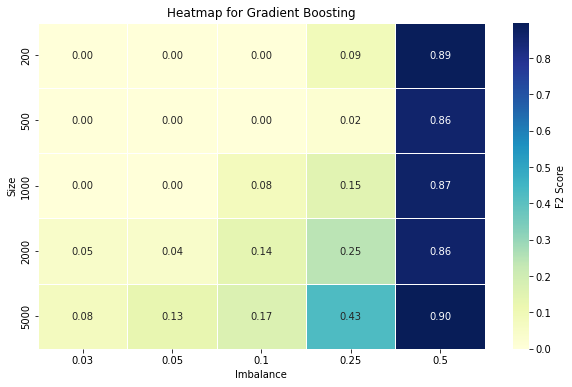

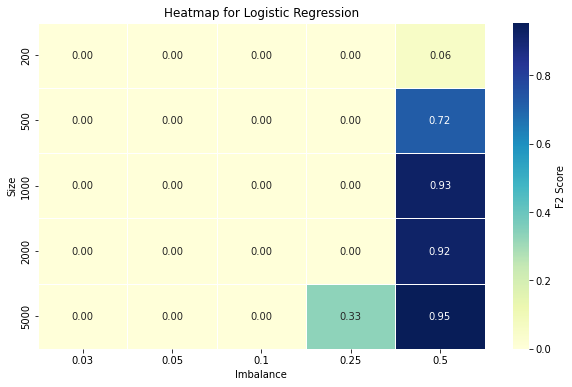

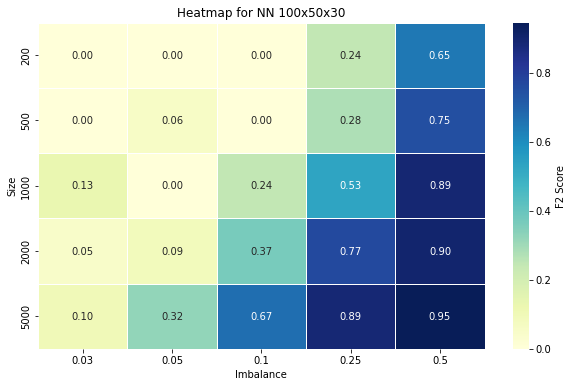

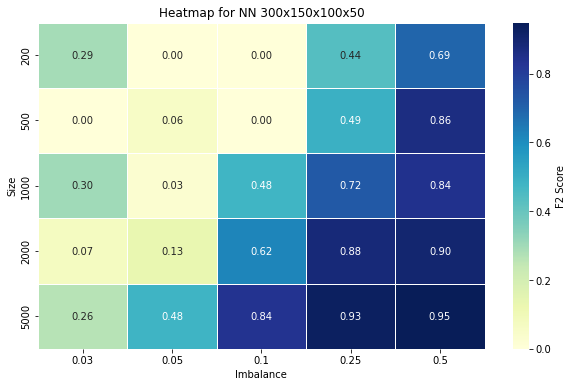

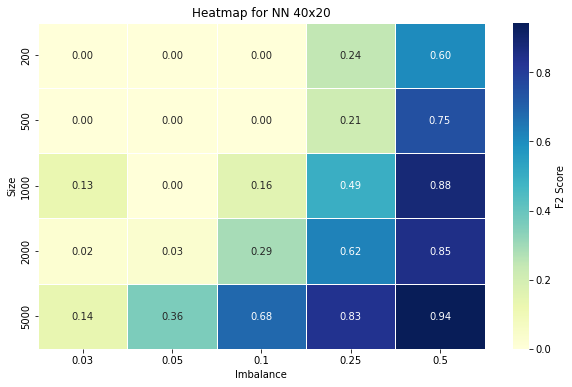

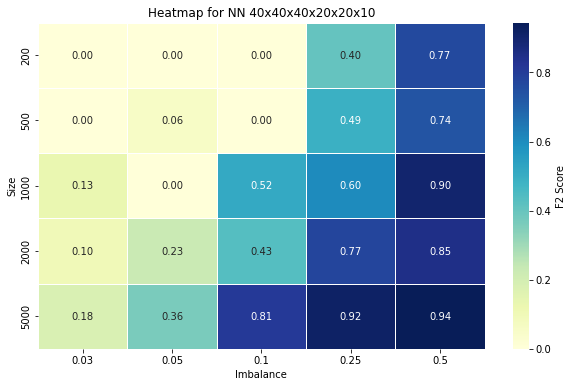

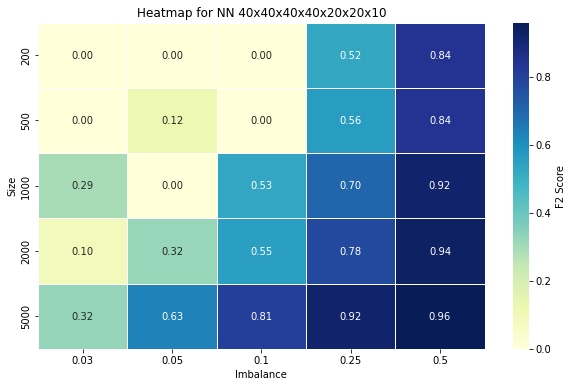

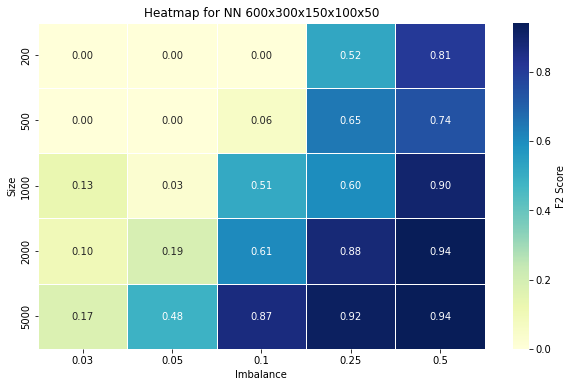

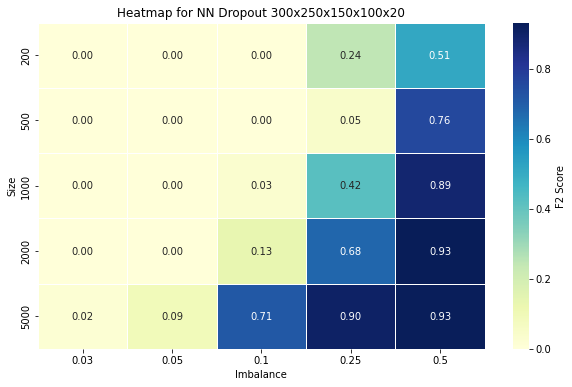

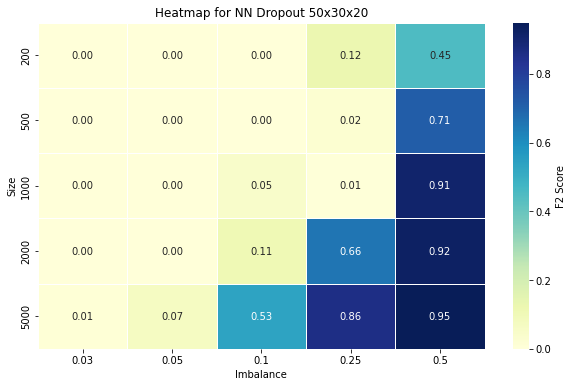

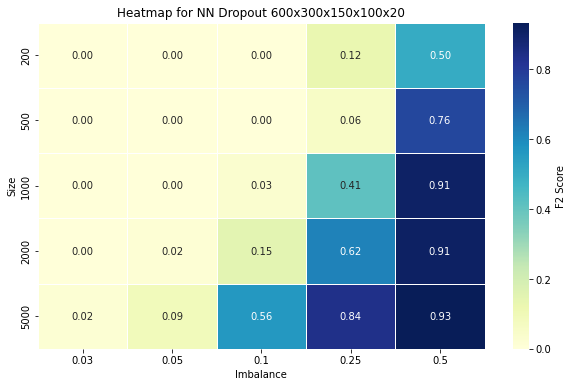

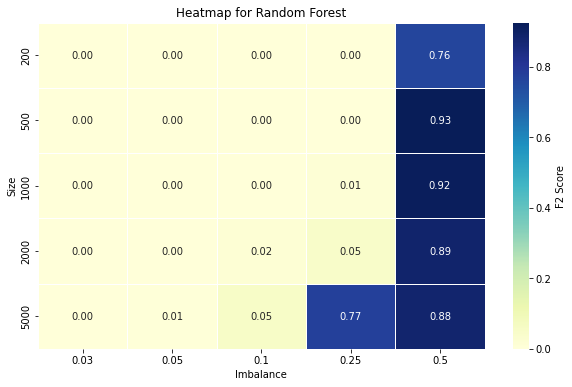

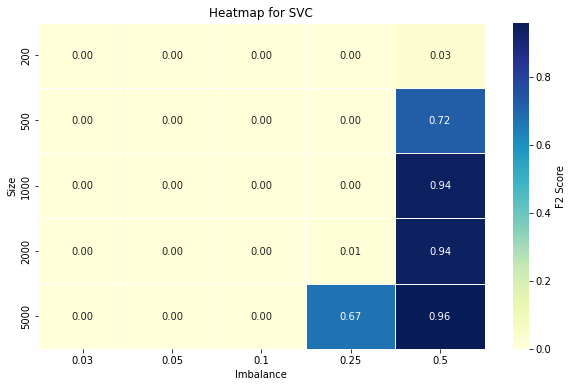

Imbalance               0.03                                    
Classifier Gradient Boosting Logistic Regression NN 100x50x30   
Size                                                            
200                 0.000000                 0.0     0.000000  \
500                 0.000000                 0.0     0.000000   
1000                0.000000                 0.0     0.128205   
2000                0.048780                 0.0     0.049505   
5000                0.076046                 0.0     0.098039   

Imbalance                                                     
Classifier NN 300x150x100x50  NN 40x20 NN 40x40x40x20x20x10   
Size                                                          
200                 0.294118  0.000000             0.000000  \
500                 0.000000  0.000000             0.000000   
1000                0.301205  0.128205             0.128205   
2000                0.073892  0.024876             0.097087   
5000                0.263653  0.136187             0.183044   

Imbalance                                                  
Classifier NN 40x40x40x40x20x20x10 NN 600x300x150x100x50   
Size                                                       
200                       0.000000              0.000000  \
500                       0.000000              0.000000   
1000                      0.294118              0.128205   
2000                      0.096618              0.096618   
5000                      0.324675              0.173745   

Imbalance                                                     ...   
Classifier NN Dropout 300x250x150x100x20 NN Dropout 50x30x20  ...   
Size                                                          ...   
200                              0.00000             0.00000  ...  \
500                              0.00000             0.00000  ...   
1000                             0.00000             0.00000  ...   
2000                             0.00000             0.00000  ...   
5000                             0.01992             0.00998  ...   

Imbalance               0.50                                  
Classifier NN 300x150x100x50  NN 40x20 NN 40x40x40x20x20x10   
Size                                                          
200                 0.694087  0.603675             0.766332  \
500                 0.864625  0.745342             0.735141   
1000                0.841482  0.883544             0.902985   
2000                0.903145  0.849949             0.851634   
5000                0.948267  0.943757             0.944070   

Imbalance                                                  
Classifier NN 40x40x40x40x20x20x10 NN 600x300x150x100x50   
Size                                                       
200                       0.841346              0.808824  \
500                       0.839161              0.735908   
1000                      0.920097              0.898594   
2000                      0.935875              0.941438   
5000                      0.958952              0.939327   

Imbalance                                                      
Classifier NN Dropout 300x250x150x100x20 NN Dropout 50x30x20   
Size                                                           
200                             0.510753            0.450820  \
500                             0.758048            0.712025   
1000                            0.885656            0.909778   
2000                            0.931300            0.923805   
5000                            0.926580            0.948872   

Imbalance                                                         
Classifier NN Dropout 600x300x150x100x20 Random Forest       SVC  
Size                                                              
200                             0.500000      0.760599  0.029940  
500                             0.762448      0.925234  0.715789  
1000                            0.906108      0.916179  0.938897  
2000                            0.90852

In [29]:
import seaborn as sns
import pandas as pd
# Reshape results for heatmap
heatmap_data_f2 = {}
for size, size_data in all_results_f2.items():
    for imbalance, classifiers_data in size_data.items():
        for classifier, result in classifiers_data.items():
            heatmap_data_f2[(size, imbalance, classifier)] = result

heatmap_df_f2 = pd.DataFrame.from_dict(heatmap_data_f2, orient='index', columns=['F2 Score'])
heatmap_df_f2.index = pd.MultiIndex.from_tuples(heatmap_df_f2.index, names=['Size', 'Imbalance', 'Classifier'])
heatmap_df_f2 = heatmap_df_f2.reset_index().pivot_table(index=['Classifier', 'Size'], columns='Imbalance', values='F2 Score')

# Plotting the heatmap for each classifier
for classifier in heatmap_df_f2.index.get_level_values(0).unique():
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_df_f2.loc[classifier], annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, cbar_kws={'label': 'F2 Score'})
    plt.title(f"Heatmap for {classifier}")
    plt.show()

# Creating a multi-level DataFrame for the summary table
summary_df_f2 = pd.DataFrame.from_dict(heatmap_data_f2, orient='index', columns=['F2 Score'])
summary_df_f2.index = pd.MultiIndex.from_tuples(summary_df_f2.index, names=['Size', 'Imbalance', 'Classifier'])
summary_df_f2 = summary_df_f2.reset_index().pivot_table(index='Size', columns=['Imbalance', 'Classifier'], values='F2 Score')

# Displaying the summary table
summary_df_f2


In [35]:
summary_df_f2.to_csv('summary_df_f2.csv')

In [24]:
heatmap_data_f2

{(200, 0.03, 'Random Forest'): 0.0,
 (200, 0.03, 'Gradient Boosting'): 0.0,
 (200, 0.03, 'SVC'): 0.0,
 (200, 0.03, 'Logistic Regression'): 0.0,
 (200, 0.03, 'NN 40x20'): 0.0,
 (200, 0.03, 'NN 100x50x30'): 0.0,
 (200, 0.03, 'NN 300x150x100x50'): 0.29411764705882354,
 (200, 0.03, 'NN 600x300x150x100x50'): 0.0,
 (200, 0.03, 'NN Dropout 50x30x20'): 0.0,
 (200, 0.03, 'NN Dropout 300x250x150x100x20'): 0.0,
 (200, 0.03, 'NN Dropout 600x300x150x100x20'): 0.0,
 (200, 0.03, 'NN 40x40x40x20x20x10'): 0.0,
 (200, 0.03, 'NN 40x40x40x40x20x20x10'): 0.0,
 (200, 0.05, 'Random Forest'): 0.0,
 (200, 0.05, 'Gradient Boosting'): 0.0,
 (200, 0.05, 'SVC'): 0.0,
 (200, 0.05, 'Logistic Regression'): 0.0,
 (200, 0.05, 'NN 40x20'): 0.0,
 (200, 0.05, 'NN 100x50x30'): 0.0,
 (200, 0.05, 'NN 300x150x100x50'): 0.0,
 (200, 0.05, 'NN 600x300x150x100x50'): 0.0,
 (200, 0.05, 'NN Dropout 50x30x20'): 0.0,
 (200, 0.05, 'NN Dropout 300x250x150x100x20'): 0.0,
 (200, 0.05, 'NN Dropout 600x300x150x100x20'): 0.0,
 (200, 0.05, 'N

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, fbeta_score

def get_model_statistics(y_true, y_pred):
    """Calculate model statistics and return them as a dictionary."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)  # Sensitivity is the same as recall
    specificity = tn / (tn + fp)
    f1 = f1_score(y_true, y_pred)
    f2 = fbeta_score(y_true, y_pred, beta=2)
    
    return {
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "F1 Score": f1,
        "F2 Score": f2,
        "Confusion Matrix": confusion_matrix(y_true, y_pred)
    }
def plot_metric(data, metric, classifier=None):
    """Plot the specified metric using a heatmap."""
    if classifier:
        plt.figure(figsize=(10, 6))
        sns.heatmap(data.xs(metric, axis=1, level=1, drop_level=False).xs(classifier, level='Classifier'), 
                    annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, cbar_kws={'label': metric})
        plt.title(f"{metric} for {classifier}")
    else:
        for classifier in data.index.get_level_values(0).unique():
            plt.figure(figsize=(10, 6))
            sns.heatmap(data.xs(metric, axis=1, level=1, drop_level=False).xs(classifier, level='Classifier'), 
                        annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, cbar_kws={'label': metric})
            plt.title(f"{metric} for {classifier}")
            plt.show()
# Initialize a dictionary to hold all results
all_results = defaultdict(lambda: defaultdict(dict))

# Loop through data sizes and imbalances
for size in data_sizes:
    for imbalance in imbalances:
        # Generate and split data
        email_data = generate_data(int(size * imbalance), size - int(size * imbalance))
        y = email_data['label']
        X_train_raw, X_test_raw, y_train, y_test = train_test_split(email_data['email_name'], y, test_size=0.8, random_state=42)
        embeddings = get_embeddings(X_train_raw, X_test_raw)
        # Train and evaluate models
        for embed_name, (X_train, X_test) in embeddings.items():
            for name, clf in classifiers.items():
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                # Get model statistics
                model_stats = get_model_statistics(y_test, y_pred_test)
                # Store the results
                #all_results[name][(size, imbalance)] = model_stats
                all_results = {classifier: {(data_size, imbalance): get_model_statistics(y_test, y_pred_test)} 
                                for classifier in classifiers 
                                for data_size in data_sizes 
                                for imbalance in imbalances}



C:\Users\nyihm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nyihm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nyihm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nyihm\AppD

In [11]:

# Create a multi-level DataFrame for easy data manipulation and visualization
results_df = pd.DataFrame.from_dict({(i,j,k): all_results[i][j][k] 
                           for i in all_results.keys() 
                           for j in all_results[i].keys()
                           for k in all_results[i][j].keys()},
                       orient='index')


In [13]:
results_df

,0
"(Random Forest, (200, 0.03), Accuracy)",0.96875
"(Random Forest, (200, 0.03), Sensitivity)",0.0
"(Random Forest, (200, 0.03), Specificity)",1.0
"(Random Forest, (200, 0.03), F1 Score)",0.0
"(Random Forest, (200, 0.03), F2 Score)",0.0
...,...
"(NN 40x40x40x40x20x20x10, (5000, 0.5), Sensitivity)",0.83543
"(NN 40x40x40x40x20x20x10, (5000, 0.5), Specificity)",0.9846
"(NN 40x40x40x40x20x20x10, (5000, 0.5), F1 Score)",0.902664
"(NN 40x40x40x40x20x20x10, (5000, 0.5), F2 Score)",0.861085


In [12]:
import seaborn as sns
import pandas as pd

# Plot a desired metric using heatmap, e.g., Accuracy for all classifiers
plot_metric(results_df, 'F2 Score')

# Display the summary table
results_df


TypeError: Index must be a MultiIndex

<Figure size 720x432 with 0 Axes>

In [18]:
results_df = pd.DataFrame.from_dict({(classifier, data_size, imbalance): all_results[classifier][(data_size, imbalance)] 
                                    for classifier in classifiers 
                                    for data_size in data_sizes 
                                    for imbalance in imbalances},
                                   orient='index')


KeyError: (200, 0.03)

In [19]:
all_results

{'Random Forest': {(5000, 0.5): {'Accuracy': 0.95825,
   'Sensitivity': 0.9451097804391217,
   'Specificity': 0.9714428857715431,
   'F1 Score': 0.9577749683944374,
   'F2 Score': 0.9501354469750176,
   'Confusion Matrix': array([[1939,   57],
          [ 110, 1894]], dtype=int64)}},
 'Gradient Boosting': {(5000, 0.5): {'Accuracy': 0.95825,
   'Sensitivity': 0.9451097804391217,
   'Specificity': 0.9714428857715431,
   'F1 Score': 0.9577749683944374,
   'F2 Score': 0.9501354469750176,
   'Confusion Matrix': array([[1939,   57],
          [ 110, 1894]], dtype=int64)}},
 'SVC': {(5000, 0.5): {'Accuracy': 0.95825,
   'Sensitivity': 0.9451097804391217,
   'Specificity': 0.9714428857715431,
   'F1 Score': 0.9577749683944374,
   'F2 Score': 0.9501354469750176,
   'Confusion Matrix': array([[1939,   57],
          [ 110, 1894]], dtype=int64)}},
 'Logistic Regression': {(5000, 0.5): {'Accuracy': 0.95825,
   'Sensitivity': 0.9451097804391217,
   'Specificity': 0.9714428857715431,
   'F1 Score': 

In [12]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score

def compute_model_statistics(y_true, y_pred):
    """
    Computes model statistics including accuracy, sensitivity, specificity, f1, f2 scores, and confusion matrix.
    
    Args:
    - y_true: Actual labels
    - y_pred: Predicted labels
    
    Returns:
    - A dictionary containing the computed metrics.
    """
    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    # Sensitivity (Recall)
    sens = recall_score(y_true, y_pred)
    # Specificity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    spec = tn / (tn + fp)
    # F1 Score
    f1 = f1_score(y_true, y_pred)
    # F2 Score
    f2 = fbeta_score(y_true, y_pred, beta=2)
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    
    return {
        "Accuracy": acc,
        "Sensitivity": sens,
        "Specificity": spec,
        "F1 Score": f1,
        "F2 Score": f2,
        "Confusion Matrix": cm
    }

def plot_metric(data, metric):
    """
    Plots the specified metric for different models.
      
    Args:
    - data: A dictionary containing metrics for different models.
    - metric: The metric to plot.
    """
    models = list(data.keys())
    values = [m[metric] for m in data.values()]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(models, values)
    plt.title(f"{metric} for Different Models")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.show()

# Compute statistics for each classifier
all_statistics = {}
for size in data_sizes:
    for imbalance in imbalances:
        # Generate and split data
        email_data = generate_data(int(size * imbalance), size - int(size * imbalance))
        y = email_data['label']
        X_train_raw, X_test_raw, y_train, y_test = train_test_split(email_data['email_name'], y, test_size=0.8, random_state=42)
        embeddings = get_embeddings(X_train_raw, X_test_raw)
        
        stats = {}
        for embed_name, (X_train, X_test) in embeddings.items():
            for name, clf in classifiers.items():
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                stats[name] = compute_model_statistics(y_test, y_pred)
        
        all_statistics[(size, imbalance)] = stats

# Create a summary table
statistics_df = pd.DataFrame.from_dict({(size, imbalance, clf): stats 
                                        for (size, imbalance), clfs in all_statistics.items() 
                                        for clf, stats in clfs.items()}, orient='index')


C:\Users\nyihm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nyihm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nyihm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nyihm\A

In [16]:
plot_metric(statistics_df,'Accuracy')

TypeError: Index must be a MultiIndex

<Figure size 720x432 with 0 Axes>

In [19]:
statistics_df.index

MultiIndex([( 200, 0.03,                 'Random Forest'),
            ( 200, 0.03,             'Gradient Boosting'),
            ( 200, 0.03,                           'SVC'),
            ( 200, 0.03,           'Logistic Regression'),
            ( 200, 0.03,                      'NN 40x20'),
            ( 200, 0.03,                  'NN 100x50x30'),
            ( 200, 0.03,             'NN 300x150x100x50'),
            ( 200, 0.03,         'NN 600x300x150x100x50'),
            ( 200, 0.03,           'NN Dropout 50x30x20'),
            ( 200, 0.03, 'NN Dropout 300x250x150x100x20'),
            ...
            (5000,  0.5,           'Logistic Regression'),
            (5000,  0.5,                      'NN 40x20'),
            (5000,  0.5,                  'NN 100x50x30'),
            (5000,  0.5,             'NN 300x150x100x50'),
            (5000,  0.5,         'NN 600x300x150x100x50'),
            (5000,  0.5,           'NN Dropout 50x30x20'),
            (5000,  0.5, 'NN Dropout 300

In [20]:
def plot_metric(dataframe, metric):
    """
    Plots the specified metric for different models, data sizes, and imbalances.
    
    Args:
    - dataframe: A DataFrame containing metrics for different models, data sizes, and imbalances.
    - metric: The metric to plot.
    """
    
    unique_sizes = dataframe.index.get_level_values(0).unique()
    unique_imbalances = dataframe.index.get_level_values(1).unique()
    
    # Loop through unique data sizes and imbalances to plot metrics
    for size in unique_sizes:
        for imbalance in unique_imbalances:
            subset = dataframe.loc[size, imbalance]
            
            plt.figure(figsize=(12, 6))
            sns.barplot(subset.index, subset[metric])
            plt.title(f"{metric} for Data Size: {size}, Imbalance: {imbalance*100}%")
            plt.ylabel(metric)
            plt.xlabel("Model")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# To visualize, for example, the F1 Score for each combination:
# plot_metric(statistics_df, "F1 Score")



In [30]:
def plot_metric(dataframe, metric):
    """
    Plots the specified metric for different models, data sizes, and imbalances.
    
    Args:
    - dataframe: DataFrame containing metrics for different models.
    - metric: The metric to plot.
    """
    plt.figure(figsize=(15, 7))
    
    # Sort dataframe for better visualization
    dataframe_sorted = dataframe.sort_values(by=metric, ascending=False)
    
    # Plotting
    sns.barplot(x=dataframe_sorted.index.get_level_values(2),  # Classifier names
                y=dataframe_sorted[metric],
                hue=dataframe_sorted.index.get_level_values(0).astype(str) + " | " + dataframe_sorted.index.get_level_values(1).astype(str),  # Data size | Imbalance
                dodge=False)
    
    # Setting labels and title
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.title(f"{metric} for Different Models, Data Sizes and Imbalances")
    plt.xticks(rotation=45)
    plt.legend(title='Size | Imbalance', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    plt.show()

# Example: Plotting F2 Score
plot_metric(statistics_df, "F2 Score")


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 1080x504 with 0 Axes>

In [31]:
plot_metric(statistics_df, "F2 Score")


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 1080x504 with 0 Axes>

In [32]:
def plot_metric(dataframe, metric):
    """
    Plots the specified metric for different models, data sizes, and imbalances.
    
    Args:
    - dataframe: DataFrame containing metrics for different models.
    - metric: The metric to plot.
    """
    plt.figure(figsize=(15, 7))
    
    # Sort dataframe for better visualization
    dataframe_sorted = dataframe.sort_values(by=metric, ascending=False)
    
    # Plotting
    sns.barplot(x=dataframe_sorted.index.get_level_values(2),  # Classifier names
                y=dataframe_sorted[metric],
                hue=dataframe_sorted.index.get_level_values(0).astype(str) + " | " + dataframe_sorted.index.get_level_values(1).astype(str),  # Data size | Imbalance
                dodge=False)
    
    # Setting labels and title
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.title(f"{metric} for Different Models, Data Sizes and Imbalances")
    plt.xticks(rotation=45)
    plt.legend(title='Size | Imbalance', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    plt.show()

# Example: Plotting F2 Score
plot_metric(statistics_df, "F2 Score")


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 1080x504 with 0 Axes>